# 準備資料
- 安裝 NLTK：conda/pip install nltk
- 英文停止詞（stop words）：stopwords_en.txt
- 英文標點符號：punctuation_en.txt
- 英文新聞文本（分析資料）：ny_news_en.txt

# 讀取新聞內容

In [1]:
with open ('ny_news_en.txt', 'r') as f:
    text = f.read()

# 分詞（Tokenization）
根據空白字元來分詞：str.spilt()

In [2]:
import nltk
words = nltk.word_tokenize(text)

In [3]:
word_list = [word for word in words]

註：若不移除標點符號，NLTK 也能正常標註詞性

# 詞性標註（POS tagger）與詞形還原（Lemmatization）
- 需下載語料庫：nltk.download('averaged_perceptron_tagger') <br>
- 詞性判斷（依上下文判斷）：nltk.pos_tag(words_list, pos=pos) <br>
- pos 設定為：n(名詞), v(動詞), a(形容詞) <br>

**注意：開頭若是大寫將無法正確轉換，如：lemmatizer.lemmatize('Animals', pos='n') => Animals**

In [4]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/prestonyu9011/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [5]:
word_tag = nltk.pos_tag(word_list)
word_tag

[('Koala', 'NNP'),
 ('Mittens', 'NNP'),
 ('and', 'CC'),
 ('Baby', 'NNP'),
 ('Bottles', 'NNP'),
 (':', ':'),
 ('Saving', 'VBG'),
 ('Australia', 'NNP'),
 ('’', 'NNP'),
 ('s', 'NN'),
 ('Animals', 'NNS'),
 ('After', 'IN'),
 ('Fires', 'NNS'),
 ('By', 'IN'),
 ('Livia', 'NNP'),
 ('Albeck-Ripka', 'NNP'),
 ('Published', 'NNP'),
 ('Jan.', 'NNP'),
 ('7', 'CD'),
 (',', ','),
 ('2020', 'CD'),
 ('Updated', 'VBD'),
 ('Jan.', 'NNP'),
 ('8', 'CD'),
 (',', ','),
 ('2020', 'CD'),
 ('WATERHOLES', 'NNP'),
 (',', ','),
 ('Australia', 'NNP'),
 ('—', 'VBZ'),
 ('The', 'DT'),
 ('convoy', 'NN'),
 ('of', 'IN'),
 ('vehicles', 'NNS'),
 ('fleeing', 'VBG'),
 ('a', 'DT'),
 ('raging', 'VBG'),
 ('inferno', 'NN'),
 ('in', 'IN'),
 ('the', 'DT'),
 ('forest', 'NN'),
 ('of', 'IN'),
 ('southeastern', 'JJ'),
 ('Australia', 'NNP'),
 ('ferried', 'VBD'),
 ('a', 'DT'),
 ('copious', 'JJ'),
 ('cargo', 'NN'),
 (':', ':'),
 ('11', 'CD'),
 ('koalas', 'NNS'),
 (',', ','),
 ('15', 'CD'),
 ('kangaroos', 'NN'),
 (',', ','),
 ('five', 'CD')

## WordCount by 詞性
建立 <br>
- 名詞列表：n_words_list <br>
- 動詞列表：v_words_list <br>
- 形容詞列表：a_words_list <br>

In [6]:
n_word_list = []
v_word_list = []
a_word_list = []

## 句子開頭大寫轉小寫：
- 判斷標準：詞性屬於專有名詞 NNP/NNPS（proper noun）以外，皆轉為小寫：str.lower() <br>

**備註：少數人名無法被 NLTK 判斷為 NNP/NNPS、少數開頭大寫的名詞被誤判為專有名詞**

In [7]:
for i in range(len(word_tag)):
    if(word_tag[i][1]!='NNP' and word_tag[i][1]!='NNPS'):
        word_list[i] = word_list[i].lower()
    else:
        continue

## 詞形還原並直接加入各詞性列表

In [8]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer() 

In [9]:
for i in range(len(word_tag)):
    if(word_tag[i][1][0]=='N'): #名詞
        n_word_list.append(lemmatizer.lemmatize(word_list[i], pos='n'))
    elif(word_tag[i][1][0]=='V'): #動詞
        v_word_list.append(lemmatizer.lemmatize(word_list[i], pos='v'))
    elif(word_tag[i][1][0]=='J'): #形容詞
        a_word_list.append(lemmatizer.lemmatize(word_list[i], pos='a'))
    else:
        continue

In [10]:
n_word_list

['Koala',
 'Mittens',
 'Baby',
 'Bottles',
 'Australia',
 '’',
 's',
 'animal',
 'fire',
 'Livia',
 'Albeck-Ripka',
 'Published',
 'Jan.',
 'Jan.',
 'WATERHOLES',
 'Australia',
 'convoy',
 'vehicle',
 'inferno',
 'forest',
 'Australia',
 'cargo',
 'koala',
 'kangaroo',
 'chicken',
 'possum',
 'dog',
 'lorikeet',
 'Susan',
 'Pulis',
 'wildlife',
 'shelter',
 'friend',
 'animal',
 'blanket',
 'basket',
 'safety',
 'coast',
 'friend',
 'downstairs',
 'bedroom',
 'house',
 'kangaroo',
 'Ms.',
 'Pulis',
 'joeys',
 'pouch',
 '’',
 's',
 'living',
 'room',
 '“',
 'fire',
 '”',
 'animal',
 'edge.',
 '”',
 'wildfire',
 'people',
 'home',
 'acre',
 'toll',
 'Australia',
 '’',
 's',
 'wildlife',
 'hundred',
 'million',
 'animal',
 'continent',
 'estimate',
 'country',
 '’',
 'ecosystem',
 '“',
 'specie',
 't',
 'extinction',
 'extinction',
 '”',
 'Kingsley',
 'Dixon',
 'ecologist',
 'botanist',
 'Curtin',
 'University',
 'Perth',
 'animal',
 'dehydration',
 'starvation',
 'Professor',
 'Dixon',
 

## 移除停止詞和標點符號
基本上沒有形容詞屬於停止詞

In [11]:
from nltk.corpus import stopwords
stopwords = set(stopwords.words('english'))

In [12]:
punctuation = set()
with open ('punctuation_en.txt', 'r') as f:
    for line in f.readlines():
        punctuation.add(line.strip())

In [13]:
n_word_list = [word for word in n_word_list if word not in stopwords and word not in punctuation]
v_word_list = [word for word in v_word_list if word not in stopwords and word not in punctuation]
a_word_list = [word for word in a_word_list if word not in stopwords and word not in punctuation]

In [14]:
n_word_list

['Koala',
 'Mittens',
 'Baby',
 'Bottles',
 'Australia',
 'animal',
 'fire',
 'Livia',
 'Albeck-Ripka',
 'Published',
 'Jan.',
 'Jan.',
 'WATERHOLES',
 'Australia',
 'convoy',
 'vehicle',
 'inferno',
 'forest',
 'Australia',
 'cargo',
 'koala',
 'kangaroo',
 'chicken',
 'possum',
 'dog',
 'lorikeet',
 'Susan',
 'Pulis',
 'wildlife',
 'shelter',
 'friend',
 'animal',
 'blanket',
 'basket',
 'safety',
 'coast',
 'friend',
 'downstairs',
 'bedroom',
 'house',
 'kangaroo',
 'Ms.',
 'Pulis',
 'joeys',
 'pouch',
 'living',
 'room',
 'fire',
 'animal',
 'edge.',
 'wildfire',
 'people',
 'home',
 'acre',
 'toll',
 'Australia',
 'wildlife',
 'hundred',
 'million',
 'animal',
 'continent',
 'estimate',
 'country',
 'ecosystem',
 'specie',
 'extinction',
 'extinction',
 'Kingsley',
 'Dixon',
 'ecologist',
 'botanist',
 'Curtin',
 'University',
 'Perth',
 'animal',
 'dehydration',
 'starvation',
 'Professor',
 'Dixon',
 'Armageddon',
 'Wildlife',
 'Australia',
 'threat',
 'fire',
 'human',
 'lands

In [15]:
v_word_list

['save',
 'update',
 'flee',
 'rag',
 'ferry',
 'run',
 'rally',
 'pack',
 'take',
 'gutted',
 'keep',
 'say',
 'kill',
 'destroy',
 'ravage',
 'inflict',
 'renowned',
 'find',
 'perish',
 'accord',
 'devastate',
 'take',
 'threaten',
 'say',
 'survive',
 'scamper',
 'hunker',
 'die',
 'add',
 'see',
 'say',
 'change',
 'decimate',
 'say',
 'spread',
 'make',
 'stitch',
 'spread',
 'base',
 'publish',
 'arrive',
 'multiply',
 'expect',
 'inhabit',
 'give',
 'burn',
 'know',
 'manage',
 'flee',
 'burn',
 'document',
 'assess',
 'say',
 'put',
 'say',
 'add',
 'lose',
 'accord',
 'ravage',
 'lose',
 'say',
 'kill',
 'ravage',
 'remain',
 'ravage',
 'take',
 'show',
 'strew',
 'raise',
 'affect',
 'put',
 'burn',
 'make',
 'earn',
 'say',
 'plan',
 'unload',
 'remain',
 'injure',
 'say',
 'burn',
 'euthanized',
 'say',
 'save',
 'make',
 'protect',
 'flee',
 'battle',
 'save',
 'reinforce',
 'protect',
 'band',
 'help',
 'fee',
 'find',
 'rehabilitate',
 'say',
 'rescue',
 'work',
 'build

In [16]:
a_word_list

['southeastern',
 'copious',
 'young',
 'quilt',
 'different',
 'least',
 'grievous',
 'many',
 'unique',
 'many',
 'close',
 'biological',
 'top',
 'wildlife',
 'astronomical',
 'heart-rending',
 'singed',
 'disastrous',
 'burned',
 'dubious',
 'high',
 'social',
 'total',
 'impossible',
 'many',
 'limited',
 'individual',
 'animal',
 'clear',
 'immense',
 'dangerous',
 'deaths.',
 'least',
 'koala',
 'various',
 'significant',
 'southern',
 'brown',
 'long-footed',
 'entire',
 'likely',
 'third',
 'grave',
 'glossy',
 'black',
 'scorched',
 'biological',
 'farming',
 'southern',
 'impossible',
 'nearby',
 'cattle',
 'many',
 'coming',
 'late',
 'last',
 'immense',
 'tiny',
 'necessary',
 'fiery',
 'fire-ravaged',
 'dehydrated',
 'hungry',
 'small',
 'small',
 'grim',
 'australian',
 'dead',
 'wildlife',
 'injured',
 'impossible',
 'sufficient',
 'lush',
 'blackened',
 'eastern',
 'first',
 'ferocious',
 'scorched',
 'alive.',
 'likely',
 'forest',
 'yards-high',
 'second',
 'intact',

# WordCount

## 名詞

In [17]:
from collections import Counter
n_word_count = Counter(n_word_list)
n_word_count.most_common(30)

[('animal', 11),
 ('fire', 10),
 ('Australia', 8),
 ('Pulis', 8),
 ('koala', 7),
 ('wildlife', 7),
 ('Ms.', 7),
 ('number', 6),
 ('kangaroo', 5),
 ('mile', 5),
 ('property', 5),
 ('coast', 4),
 ('estimate', 4),
 ('country', 4),
 ('town', 4),
 ('tree', 4),
 ('forest', 3),
 ('shelter', 3),
 ('friend', 3),
 ('pouch', 3),
 ('home', 3),
 ('hundred', 3),
 ('population', 3),
 ('scientist', 3),
 ('region', 3),
 ('Victoria', 3),
 ('farmer', 3),
 ('time', 3),
 ('water', 3),
 ('Jan.', 2)]

<BarContainer object of 30 artists>

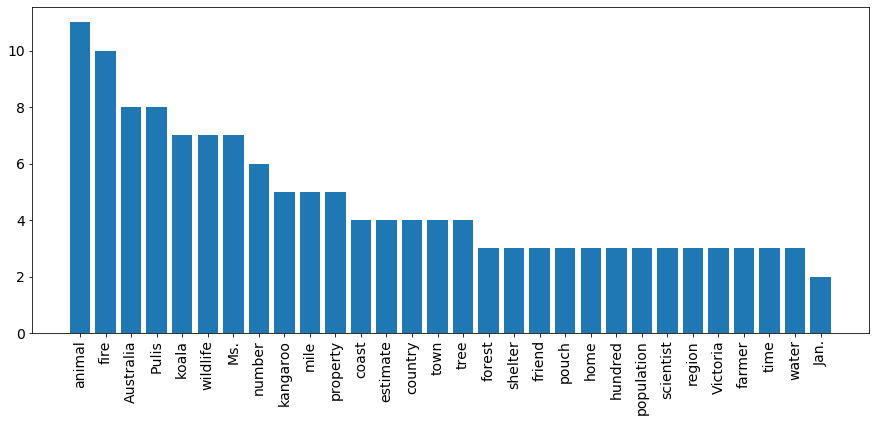

In [18]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,6))
plt.xticks(rotation='vertical', size=14)
plt.yticks(size=14)
plt.bar(list(dict(n_word_count.most_common()).keys())[:30], 
        list(dict(n_word_count.most_common()).values())[:30], align='center')

## 動詞

In [19]:
v_word_count = Counter(v_word_list)
v_word_count.most_common()

[('say', 16),
 ('burn', 5),
 ('ravage', 4),
 ('make', 4),
 ('give', 4),
 ('remain', 4),
 ('save', 3),
 ('flee', 3),
 ('take', 3),
 ('find', 3),
 ('threaten', 3),
 ('put', 3),
 ('lose', 3),
 ('keep', 2),
 ('kill', 2),
 ('accord', 2),
 ('add', 2),
 ('spread', 2),
 ('expect', 2),
 ('know', 2),
 ('injure', 2),
 ('protect', 2),
 ('rehabilitate', 2),
 ('rescue', 2),
 ('leave', 2),
 ('bring', 2),
 ('update', 1),
 ('rag', 1),
 ('ferry', 1),
 ('run', 1),
 ('rally', 1),
 ('pack', 1),
 ('gutted', 1),
 ('destroy', 1),
 ('inflict', 1),
 ('renowned', 1),
 ('perish', 1),
 ('devastate', 1),
 ('survive', 1),
 ('scamper', 1),
 ('hunker', 1),
 ('die', 1),
 ('see', 1),
 ('change', 1),
 ('decimate', 1),
 ('stitch', 1),
 ('base', 1),
 ('publish', 1),
 ('arrive', 1),
 ('multiply', 1),
 ('inhabit', 1),
 ('manage', 1),
 ('document', 1),
 ('assess', 1),
 ('show', 1),
 ('strew', 1),
 ('raise', 1),
 ('affect', 1),
 ('earn', 1),
 ('plan', 1),
 ('unload', 1),
 ('euthanized', 1),
 ('battle', 1),
 ('reinforce', 1),
 

<BarContainer object of 30 artists>

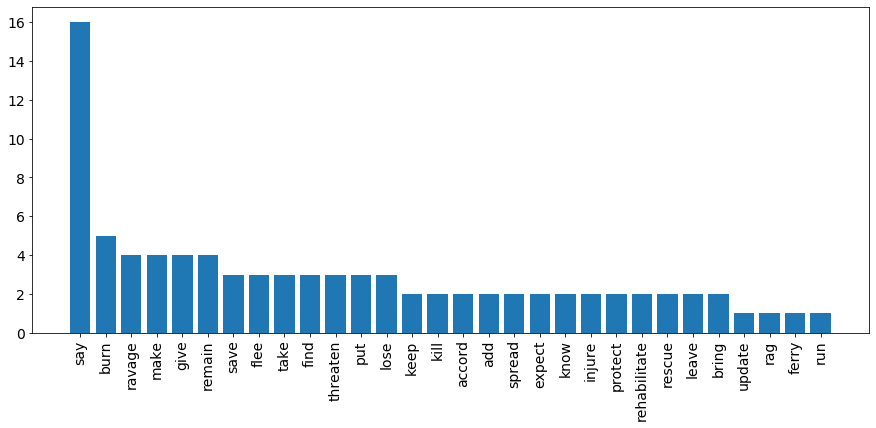

In [20]:
plt.figure(figsize=(15,6))
plt.xticks(rotation='vertical', size=14)
plt.yticks(size=14)
plt.bar(list(dict(v_word_count.most_common()).keys())[:30], 
        list(dict(v_word_count.most_common()).values())[:30], align='center')

# 形容詞

In [21]:
a_word_count = Counter(a_word_list)
a_word_count.most_common()

[('many', 4),
 ('impossible', 3),
 ('least', 2),
 ('biological', 2),
 ('wildlife', 2),
 ('immense', 2),
 ('southern', 2),
 ('likely', 2),
 ('scorched', 2),
 ('small', 2),
 ('quiet', 2),
 ('southeastern', 1),
 ('copious', 1),
 ('young', 1),
 ('quilt', 1),
 ('different', 1),
 ('grievous', 1),
 ('unique', 1),
 ('close', 1),
 ('top', 1),
 ('astronomical', 1),
 ('heart-rending', 1),
 ('singed', 1),
 ('disastrous', 1),
 ('burned', 1),
 ('dubious', 1),
 ('high', 1),
 ('social', 1),
 ('total', 1),
 ('limited', 1),
 ('individual', 1),
 ('animal', 1),
 ('clear', 1),
 ('dangerous', 1),
 ('deaths.', 1),
 ('koala', 1),
 ('various', 1),
 ('significant', 1),
 ('brown', 1),
 ('long-footed', 1),
 ('entire', 1),
 ('third', 1),
 ('grave', 1),
 ('glossy', 1),
 ('black', 1),
 ('farming', 1),
 ('nearby', 1),
 ('cattle', 1),
 ('coming', 1),
 ('late', 1),
 ('last', 1),
 ('tiny', 1),
 ('necessary', 1),
 ('fiery', 1),
 ('fire-ravaged', 1),
 ('dehydrated', 1),
 ('hungry', 1),
 ('grim', 1),
 ('australian', 1),
 (

<BarContainer object of 30 artists>

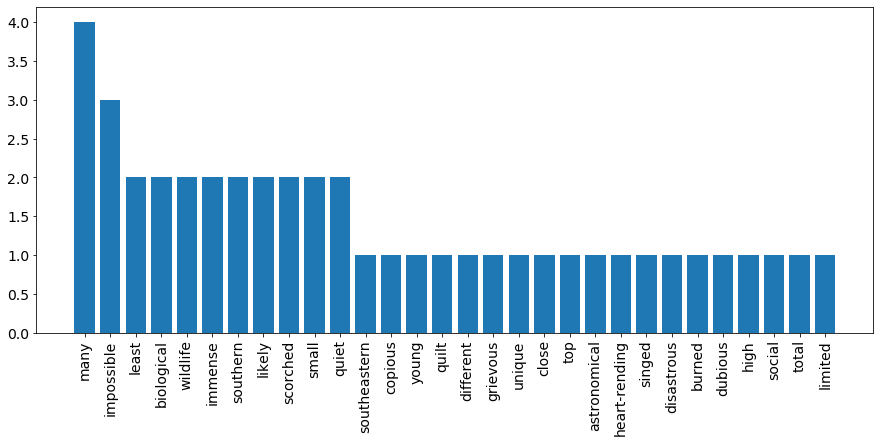

In [22]:
plt.figure(figsize=(15,6))
plt.xticks(rotation='vertical', size=14)
plt.yticks(size=14)
plt.bar(list(dict(a_word_count.most_common()).keys())[:30], 
        list(dict(a_word_count.most_common()).values())[:30], align='center')